# STUDENT SCORES LINEAR REGRESSION

In [35]:
import pandas as pd
import numpy as np

# Load your original dataset
df = pd.read_csv('/content/student_scores_upsampled_noisy.csv')

# Upsample to 100 rows
if len(df) < 100:
    # Repeat and sample to reach 100 rows
    df_upsampled = df.sample(n=100, replace=True, random_state=42).reset_index(drop=True)
else:
    # If already 100 or more, just take the first 100
    df_upsampled = df.head(100).copy()

# Add random noise
np.random.seed(42)
noise_hours = np.random.normal(0, 0.8, size=100)
noise_scores = np.random.normal(0, 10, size=100)

df_upsampled['Hours'] += noise_hours
df_upsampled['Scores'] += noise_scores

# Clip values to keep them realistic
df_upsampled['Hours'] = df_upsampled['Hours'].clip(lower=0)
df_upsampled['Scores'] = df_upsampled['Scores'].clip(lower=0, upper=100)

# Save the upsampled, noisy dataset
df_upsampled.to_csv('student_scores_upsampled_noisy.csv', index=False)

print("Upsampled and noisy dataset saved as 'student_scores_upsampled_noisy.csv'.")


Upsampled and noisy dataset saved as 'student_scores_upsampled_noisy.csv'.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# 1. Load Data
url = '/content/student_scores.csv'
df = pd.read_csv(url)

In [27]:
# 2. Preprocessing
print("Missing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

Missing values:
 Hours     0
Scores    0
dtype: int64

Summary statistics:
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


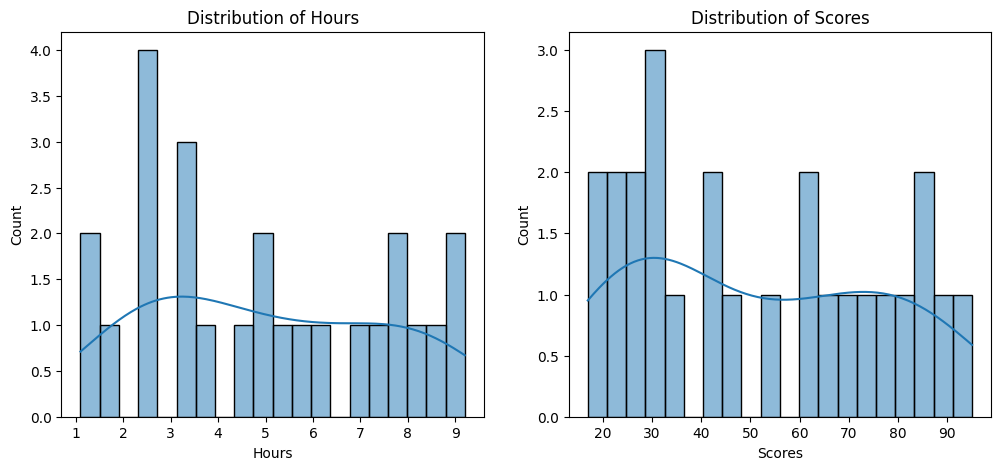

In [28]:
# 3. Distribution Plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Hours'], kde=True, bins=20)
plt.title('Distribution of Hours')
plt.subplot(1,2,2)
sns.histplot(df['Scores'], kde=True, bins=20)
plt.title('Distribution of Scores')
plt.show()

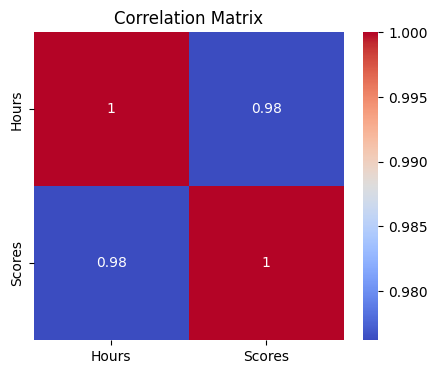

In [29]:
# 4. Correlation Matrix
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# 5. Linear Regression
X = df[['Hours']]
y = df['Scores']

In [31]:
# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [32]:
# Predict
y_pred = lr.predict(X_test)

# 6. Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score (Accuracy): {r2:.2f}")

Mean Squared Error (MSE): 18.94
Root Mean Squared Error (RMSE): 4.35
R^2 Score (Accuracy): 0.97


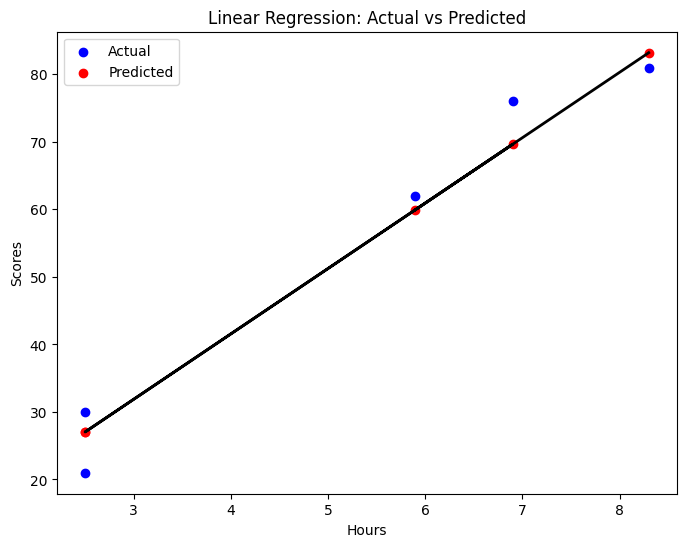

In [34]:
# 7. Plot Regression Line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()